# MATPLOTLIB

In [41]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

#sample data
x = np.linspace(0,1.5,100)
e = np.random.randn(100)/10
ee = np.random.randn(100,5)/10
y = np.sin(x)
dates = [date(2015,9,21) + timedelta(i) for i in range(100)]

In [4]:
%matplotlib inline

# Charts

### Plot, scatter, hist, boxplot, violinplot...

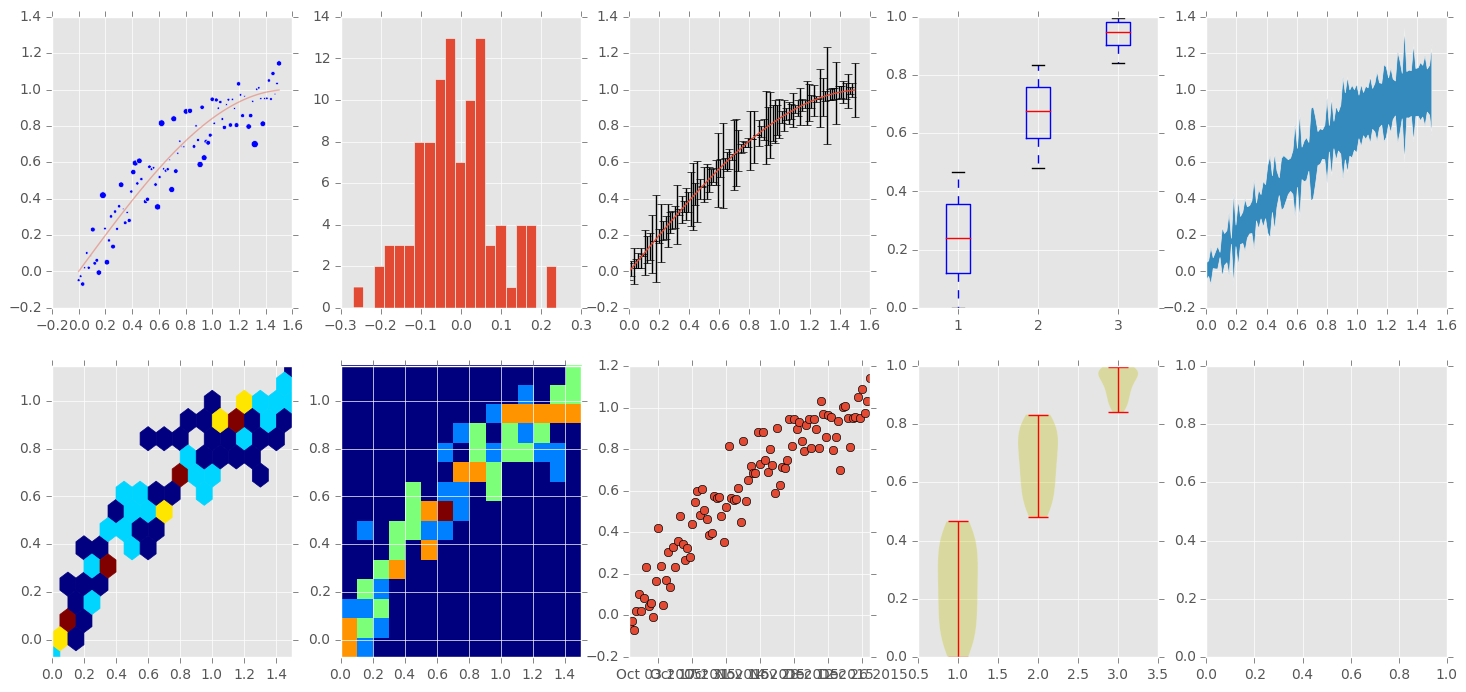

In [11]:
f, ax = plt.subplots(2, 5, figsize = (18,8))
ax = ax.ravel()

ax[0].scatter(x, y+e, marker='o', s=100*abs(e))
ax[0].plot(x,y, alpha = 0.4)
ax[1].hist(e, bins=20)
ax[2].errorbar(x, y, yerr=e, ecolor='k')
ax[3].boxplot([y[:33], y[33:66], y[66:]])
ax[4].fill_between(x, y*0.9-abs(e) ,y*1.1+abs(e))
ax[5].hexbin(x,y+e, gridsize=15, mincnt=1)
ax[6].hist2d(x,y+e, bins=15);
ax[7].plot_date(dates, y+e)
ax[8].violinplot([y[:33], y[33:66], y[66:]]);

Other kinds of (interesting) charts
```python
step()
stem()

loglog()
semilogx(), semilogy()
contour()
matshow()
imshow()

xcorr()           #cross correlation
acorr()           #autocorrelation
cohere()
csd()             #cross spectral density
psd()             #power spectral density
magnitude_spectrum()
phase_spectrum()
```

### More special features


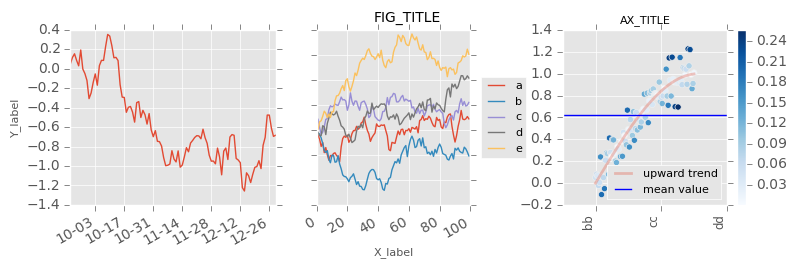

In [103]:
f, ax = plt.subplots(1, 3, figsize = (9, 2.5))

ax[0].plot_date(dates, np.cumsum(e), ls='-', ms=0)
#matplotlib.dates.num2date()
ax[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d'))
f.autofmt_xdate()
ax[0].set_ylabel('Y_label', fontsize=8)                   #get_xlim()

ax[1].plot(np.cumsum(ee, axis=0))
ax[1].set_yticklabels([])
ax[1].set_xlabel('X_label', fontsize=8)                   #get_xlim()
ax[1].legend(['a','b','c','d','e'], loc='right', fontsize=8,bbox_to_anchor=(0.7, 0, 0.7, 1))   #move legend ouside
box = ax[1].get_position()
ax[1].set_position([box.x0, box.y0, box.width * 0.75, box.height])   #shrink ax so that legend "fits"

a = ax[2].scatter(x, y+e, alpha = 1, marker='o', label='', c=abs(e), cmap='Blues')
ax[2].plot(x, y, lw=2, alpha = 0.3, marker='', ms=0, label='upward trend')
ax[2].grid(True)
ax[2].set_xlim([-0.5,2])
ax[2].set_title('AX_TITLE', fontsize=8)
ax[2].locator_params(tight=True,axis='x', nbins=3)        #show only 3 labels
ax[2].axhline(y=np.mean(y), xmin=0, xmax=2, label='mean value')     #horizontal line
#ticks = ax.get_xticks()                           #returns locations and labels. 
ax[2].set_xticklabels(['aa','bb','cc','dd','ee','ff','gg'], rotation = 90, fontsize = 'small');
#ax[2].axis('off')                                 #hides the background
ax[2].legend(fontsize=8, loc='lower right')                      #label='_nolegend_' to exclude)
f.colorbar(a)                                      #colorbar

plt.suptitle('FIG_TITLE')    
#plt.tight_layout()           #conflicts with shrinking the ax[1]

###Multiple charts

Subplots
```python
ax = f.add_subplot(1,1,1)
f,ax = plt.subplots(2,3)
plt.subplot2grid()                         #geometry of the grid and the location of the subplot in the grid
```

Layout
```python
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)   #padding/spacing around subplots (as % of size)
plt.subplots_adjust(left=0.15)
```

Sharing scales
```python
ax2 = ax1.twinx()                         #overlay and share X
ax2 = fig.add_subplot(2,1,2, sharex=ax1)
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey=True)
```

### Chart arguments
Colors
```python
c=  'b','c','g','k','m','r','w','y'   #by short-name
```

Line
```python
lw  = 3                              # linewidth=3
ls  = '-'  '--'  '-.'  ':' ' None'   # linestyle='-'
```

Markers
```python
marker = '.' 'o' '^' '+' '*' 'x' 'd'
ms = 3                               #markersize
mec=                                 #markeredgecolor
mew=                                 #markeredgewidth
mfc=                                 #markerfacecolor
```

Legend location information
```python
best (0), upper right(1), upper left (2), lower left (3), lower right (4), right (5), center
left (6), center right (7), lower center (8), upper center (9), center( 10). Alternatively, specify relative
coordinate tuples: (0,0), (0,1) etc
```

Font
```python
fontsize= 'small'
fontweight= 'bold'
```

# General


#### Overall behaviour
```python
plt.interactive(False)
plt.hold(True)                    #True: subsequent plot commands will be added to the current axes.
                                  #False: the current axes and figure will be cleared on the next plot command
plt.gcf()                         #reference to active figure
plt.close()
plt.close('all')
plt.cla()                         #clear axis
plt.clf()                         #clear figure
```

#### Interactivity
If noninteractive, then `show()` or `draw()` functions need to be called for the figure to show/update.  
Activate the interactive mode: `plt.ion()` or `plt.interactive(True)` 

#### Backends and jupyter notebook
```python
%matplotlib inline                 #ipython magics
%matplotlib qt
%matplotlib notebook
```


#### Syntax styles
```python
#Object oriented style
fig = plt.figure()
ax = fig.add_subplot(111)
pl = ax.plot(x,y)
fig.show()

#Pyplot style
plt.plot(x,y)

#Pylab style
from pylab import * [or ipython pylab]
plot(x,y)
```

#### Output
```python
plt.savefig('name.png')          #formats: raster images (PNG, JPG), vector images (SVG, PS, PDF, EPS)
```

# References
 1. [Matplotlib documentation site](http://matplotlib.org/api/axes_api.html) 
 2. [Python Data Visualization Cookbook](http://shop.oreilly.com/product/9781782163367.do)